### Block coordinate minimization (BCM) for sparse coding for a wave+spike model

In-class group activity, EECS 598-006 W19

Given a noisy signal $y = x + \epsilon \in R^N$,
this notebook performs *sparse coding* by solving
$$
\hat{z} = \arg \min_z \frac{1}{2} \| y - D z \|^2_2 + \beta \|z\|_0
$$
to find sparse coefficients $\hat{z}$
for a dictionary $D$.
After finding those coefficients,
the denoised estimate of the latent signal is
$ \hat{x} = D \hat{z}$.

This notebook considers signals that are modeled
as the sum of
a smooth component
plus a few Kronecker impulses.
For this "wave + spike" model,
a reasonable dictionary is the
$N \times 2N$ matrix
$D = [D_1 \ D_2]$
where
$D_1$ is an (inverse) discrete cosine transform (DCT),
and
$D_2$ is the identity matrix.

There is no analytical solution to the sparse coding problem above.
However, because $D_1$ and $D_2$ are both unitary matrices,
it is easy to perform two-block BCM
that alternates between updating
coefficient vectors $z_1$ and $z_2$,
where $z = (z_1,z_2)$.
This notebook applies BCM to a signal
formed by adding a (smooth) polynomial and a few spikes.

2019-03-27 Jeff Fessler, University of Michigan

# Class version!!

In [1]:
# Packages needed
using MIRT: jim
using FFTW: idct
using LinearAlgebra: I, norm
using Plots
using LaTeXStrings
using Random: seed!

In [2]:
#?idct # uncomment if you want to know more about DCT

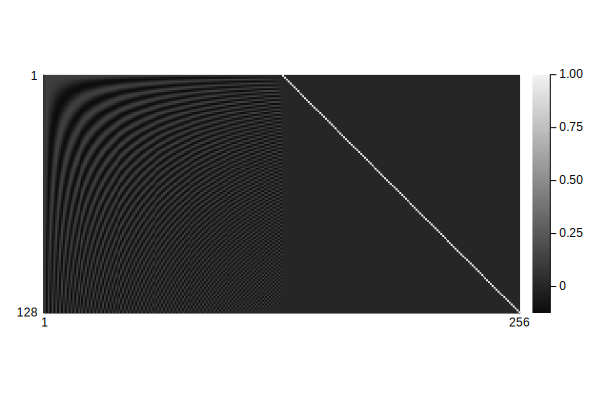

In [3]:
# This 1D problem is small enough that we use the full DCT matrix and identity matrix.
# For a large-scale problem, we would make D1 and D2 a LinearMap instead.
N = 2^7
D1 = idct(Matrix(I,N,N), 1) # inverse DCT basis
D2 = Matrix(1.0I,N,N) # I
D = [D1 D2] # over-complete dictionary
jim(D')

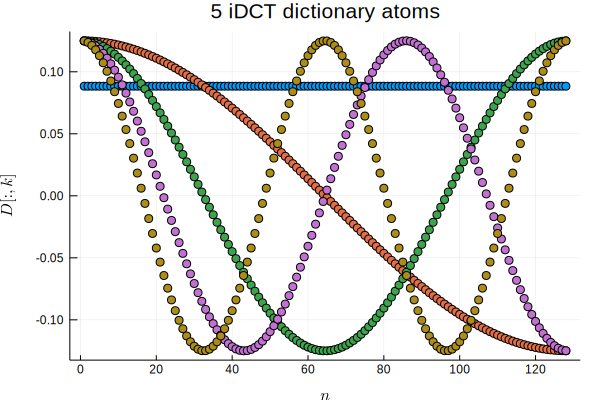

In [4]:
scatter(D1[:,1:5], label="", xlabel=L"n", ylabel=L"D[:,k]", title="5 iDCT dictionary atoms")

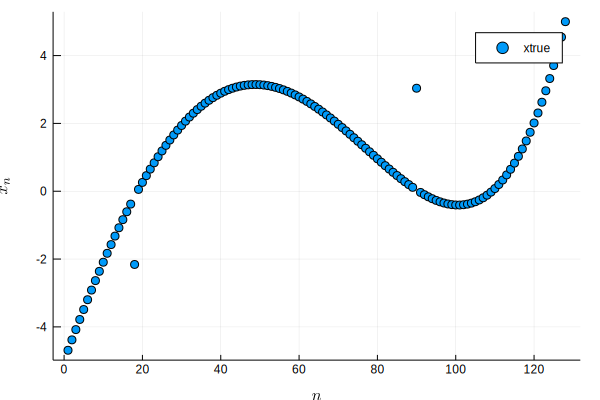

In [5]:
# generate a true signal using a polynomial with a couple spikes
# xtrue = sqrt(N)*(D1[:,5] + D1[:,2]) - 2D2[:,18] + 3D2[:,90] # "planted model" for testing only
t = (1:N)/N
xtrue = 10*(8t.^4 - 8t.^3 - 3t.^2 + 4t .- 0.5) - 2D2[:,18] + 3D2[:,90]
scatter(xtrue, label="xtrue", xlabel=L"n", ylabel=L"x_n")

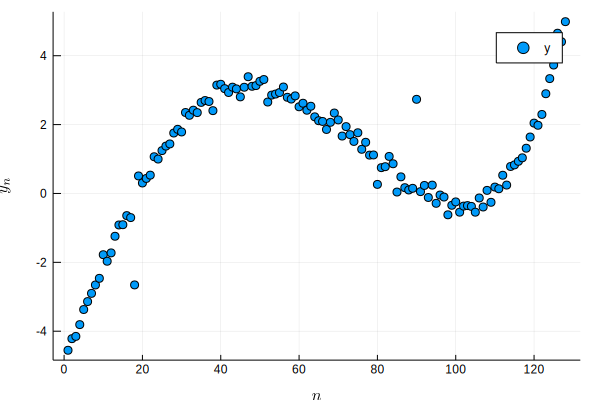

In [6]:
# make noisy signal
seed!(0)
sig = 0.2
y = xtrue + sig * randn(N)
scatter(y, label="y", xlabel=L"n", ylabel=L"y_n")

The dictionary $D$ is a tight frame so we can use its pseudo-inverse
to find the minimum-norm coefficient vector $z$
that represents the signal $y$ perfectly.
However, these coefficients are not sparse,
so they do not provide any denoising.

Think about why there is a $1/2$ here!

norm(D * zh_frame - y) = 7.606262184469072e-15


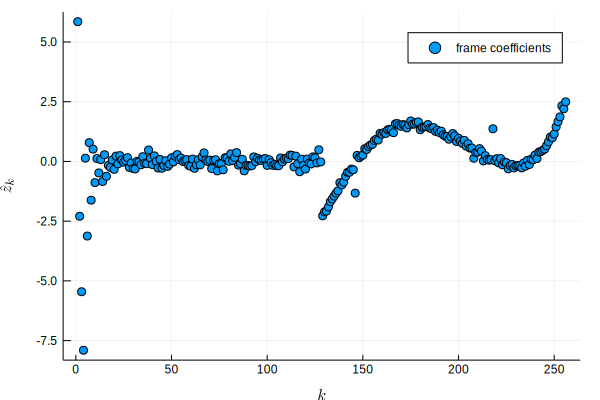

In [7]:
zh_frame = 1/2 * D' * y
@show norm(D*zh_frame - y) # basically 0
scatter(zh_frame, label="frame coefficients", xlabel=L"k", ylabel=L"\hat{z}_k")

### Perform sparse coding
$
\hat{z} = \arg \min_z \frac{1}{2} \| y - D z \|^2_2 + \beta \|z\|_0
$

Then
$\hat{x} = D \hat{z}$

Use $\beta = 0.7$

In [8]:
# at least one of these shrinkage functions should be useful
soft = (z,b) -> sign(z) * max(abs(z) - b, 0)
hard = (z,b) -> z * (abs(z) > sqrt(2b))

#5 (generic function with 1 method)

In [9]:
# you will need some proximal operator(s) here


#9 (generic function with 1 method)

In [10]:
# loop over 20 iterations of BCM here
# initialize the sparse coefficients to be all zero
# update the iDCT coefficients first, then the D2=I coefficients.

# code here


# zh = ? # estimate of sparse coefficients
# xh = ? # estimate of latent signal

In [ ]:
# Plot the estimated signal and compare to the true signal
# If it is working you should see a great reduction in noise compared to data y
scatter(xh, label=L"\hat{x}", xlabel=L"n", ylabel=L"\hat{x}_n")
scatter!(xtrue, label="xtrue", legend=:bottomright)

In [ ]:
# plot the sparse coefficients.
# if it is all working they should be much sparser than the frame coefficients above
scatter(zh, label="sparse coefficients", xlabel=L"k", ylabel=L"\hat{z}_k")

### Count the number of non-zero coefficients and report that value to Canvas

In [ ]:
findall(z1 .!= 0), findall(z2 .!= 0)

In [ ]:
count(z1 .!= 0), count(z2 .!= 0)

### Optional extensions if time permits

* Experiment with the regularization parameter(s) to try to improve the results
* Plot the cost function versus iteration
* Initialize $z$ using orthogonal matching pursuit (OMP) instead of $0$
* Compare the convergence speed of 2-block BCM to that of POGM
* Compare hard thresholding (0-norm) to soft thresholding (1-norm)
* Compare the 2-block BCM to the 2N-block BCM